In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

def grade_to_numeric(grade):
    if isinstance(grade, float):
        return -1
    return int(grade[-1])

def age(x): #yas 5lik aralıklarda gruplandı
    if x > 100:
        return 21
    return x // 5


data = pd.read_csv("dataset/csv_building_structure.csv")

data["age_building"] = data["age_building"].apply(age)

In [2]:
import pandas as pd
land_surface_condition = pd.get_dummies(data['land_surface_condition'])

land_surface_condition.drop('Flat', axis=1, inplace=True)
data.drop('land_surface_condition', axis=1, inplace=True)

land_surface_condition.columns = ['land_surface_condition_Moderate_slope', 'land_surface_condition_Steep_slope']

count = 0
for col in land_surface_condition.columns: 
    print(str(col) + " " +str(count))
    count += 1

land_surface_condition_Moderate_slope 0
land_surface_condition_Steep_slope 1


In [3]:
roof_type = pd.get_dummies(data['roof_type'])

roof_type.drop('RCC/RB/RBC', axis=1, inplace=True)
data.drop('roof_type', axis=1, inplace=True)

roof_type.columns = ['roof_type_Bamboo/Timber-Heavy_roof', 'roof_type_Bamboo/Timber-Light_roof']


count = 0
for col in roof_type.columns: 
    print(str(col) + " " +str(count))
    count+=1

roof_type_Bamboo/Timber-Heavy_roof 0
roof_type_Bamboo/Timber-Light_roof 1


In [4]:
ground_floor_type=pd.get_dummies(data['ground_floor_type'])

ground_floor_type.drop('Other', axis=1, inplace=True)
data.drop('ground_floor_type', axis=1, inplace=True)

ground_floor_type.columns = ['ground_floor_type_Brick/Stone', 'ground_floor_type_Mud', "ground_floor_type_RC", "ground_floor_type_Timber"]


count = 0
for col in ground_floor_type.columns: 
    print(str(col) + " " +str(count))
    count+=1

ground_floor_type_Brick/Stone 0
ground_floor_type_Mud 1
ground_floor_type_RC 2
ground_floor_type_Timber 3


In [5]:
other_floor_type = pd.get_dummies(data['other_floor_type'])

other_floor_type.drop('RCC/RB/RBC', axis=1, inplace=True)
data.drop('other_floor_type', axis=1, inplace=True)

other_floor_type.columns = ['other_floor_type_Not_applicable', 'other_floor_type_TImber/Bamboo-Mud', "other_floor_type_Timber-Planck"]


count = 0
for col in other_floor_type.columns: 
    print(str(col) + " " +str(count))
    count+=1

other_floor_type_Not_applicable 0
other_floor_type_TImber/Bamboo-Mud 1
other_floor_type_Timber-Planck 2


In [6]:
foundation_type = pd.get_dummies(data['foundation_type'])

foundation_type.drop('Other', axis=1, inplace=True)
data.drop('foundation_type', axis=1, inplace=True)

foundation_type.columns = ['foundation_type_Bamboo/Timber', 'foundation_type_Cement-Stone/Brick', "foundation_type_Mud mortar-Stone/Brick", "foundation_type_RC"]


count = 0
for col in foundation_type.columns: 
    print(str(col) + " " +str(count))
    count+=1

foundation_type_Bamboo/Timber 0
foundation_type_Cement-Stone/Brick 1
foundation_type_Mud mortar-Stone/Brick 2
foundation_type_RC 3


In [7]:
position = pd.get_dummies(data['position'])

position.drop('Attached-3 side', axis=1, inplace=True)
data.drop('position', axis=1, inplace=True)

position.columns = ['position_Attached-1_side', 'position_Attached-2_side', "position_Not_attached"]


count = 0
for col in position.columns: 
    print(str(col) + " " +str(count))
    count+=1

position_Attached-1_side 0
position_Attached-2_side 1
position_Not_attached 2


In [8]:
plan_configuration = pd.get_dummies(data['plan_configuration'])

plan_configuration.drop('Others', axis=1, inplace=True)
data.drop('plan_configuration', axis=1, inplace=True)

plan_configuration.columns = ["plan_configuration_Building_with_Central_Courtyard", "plan_configuration_E-shape", "plan_configuration_H-shape", "plan_configuration_L-shape", "plan_configuration_Multi_Projected", "plan_configuration_Rectangular", "plan_configuration_Square", "plan_configuration_T_Shape", "plan_configuration_U_Shape"]

count = 0
for col in plan_configuration.columns: 
    print(str(col) + " " +str(count))
    count+=1

plan_configuration_Building_with_Central_Courtyard 0
plan_configuration_E-shape 1
plan_configuration_H-shape 2
plan_configuration_L-shape 3
plan_configuration_Multi_Projected 4
plan_configuration_Rectangular 5
plan_configuration_Square 6
plan_configuration_T_Shape 7
plan_configuration_U_Shape 8


In [9]:
data = pd.concat([data,land_surface_condition], axis=1)

data = pd.concat([data,roof_type], axis=1)

data = pd.concat([data,ground_floor_type], axis=1)

data = pd.concat([data,other_floor_type], axis=1)

data = pd.concat([data,foundation_type], axis=1)

data = pd.concat([data,position], axis=1)

data = pd.concat([data,plan_configuration], axis=1)

data['target'] = data['damage_grade'].apply(grade_to_numeric)
data.drop('damage_grade', axis=1, inplace=True)
data.drop('technical_solution_proposed', axis=1, inplace=True)

data.drop('district_id', axis=1, inplace=True)
data.drop('vdcmun_id', axis=1, inplace=True)
data.drop('ward_id', axis=1, inplace=True)
data.drop('count_floors_post_eq', axis=1, inplace=True)
data.drop('height_ft_post_eq', axis=1, inplace=True)

data.drop('building_id', axis=1, inplace=True)
data.drop('condition_post_eq', axis=1, inplace=True)

count = 0
for col in data.columns: 
    print(str(col) + " " + str(count))
    count += 1

print("------------------------------------")
print(count)
print("------------------------------------")

print(data.head())

count_floors_pre_eq 0
age_building 1
plinth_area_sq_ft 2
height_ft_pre_eq 3
has_superstructure_adobe_mud 4
has_superstructure_mud_mortar_stone 5
has_superstructure_stone_flag 6
has_superstructure_cement_mortar_stone 7
has_superstructure_mud_mortar_brick 8
has_superstructure_cement_mortar_brick 9
has_superstructure_timber 10
has_superstructure_bamboo 11
has_superstructure_rc_non_engineered 12
has_superstructure_rc_engineered 13
has_superstructure_other 14
land_surface_condition_Moderate_slope 15
land_surface_condition_Steep_slope 16
roof_type_Bamboo/Timber-Heavy_roof 17
roof_type_Bamboo/Timber-Light_roof 18
ground_floor_type_Brick/Stone 19
ground_floor_type_Mud 20
ground_floor_type_RC 21
ground_floor_type_Timber 22
other_floor_type_Not_applicable 23
other_floor_type_TImber/Bamboo-Mud 24
other_floor_type_Timber-Planck 25
foundation_type_Bamboo/Timber 26
foundation_type_Cement-Stone/Brick 27
foundation_type_Mud mortar-Stone/Brick 28
foundation_type_RC 29
position_Attached-1_side 30
positi

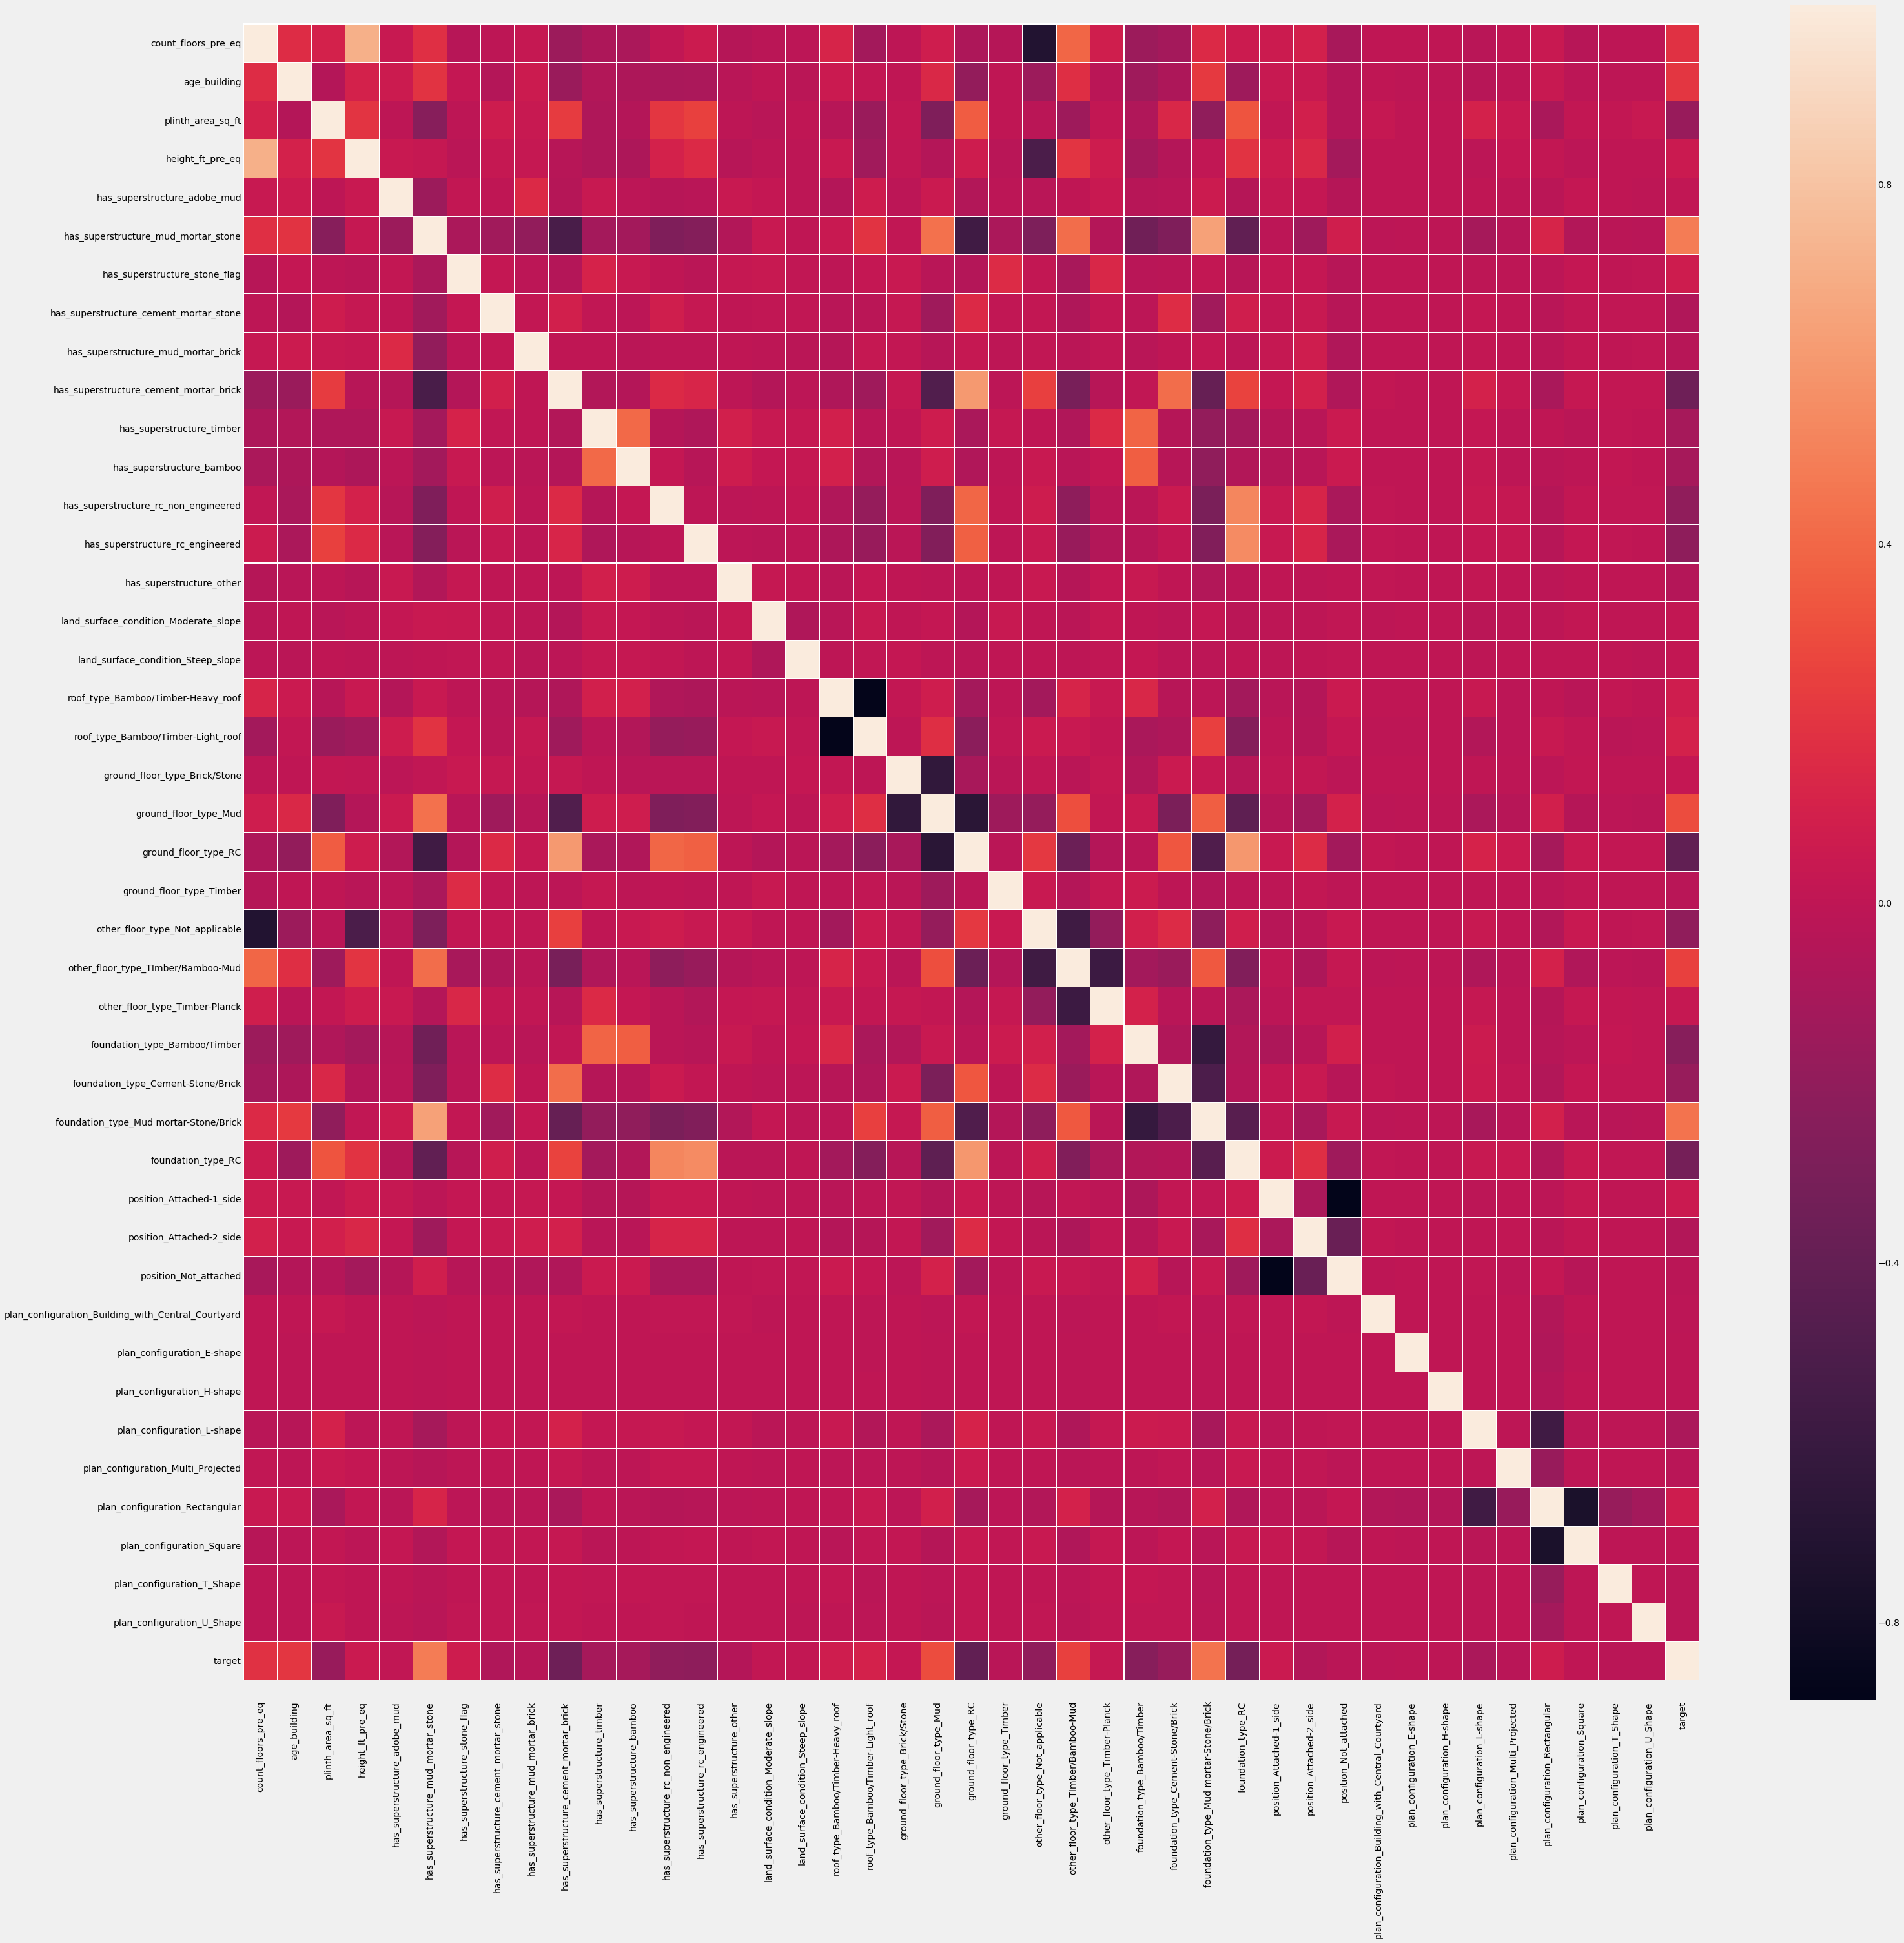

In [16]:
corr_matrix = data.corr()
feature = corr_matrix.index
plt.figure(figsize = (45,45))
g=sns.heatmap(corr_matrix,linewidths = 0.1,annot = False)
bottom, top = g.get_ylim()
g.set_ylim(bottom + 0.5, top - 0.5)
plt.savefig('corr_mat.png', bbox_inches = "tight")
corr_target_row = corr_matrix["target"]

In [11]:
# Get damage_level counts

damage_counts = []
data.groupby('target').count()['age_building']

target
-1        12
 1     78815
 2     87257
 3    136412
 4    183844
 5    275766
Name: age_building, dtype: int64

In [12]:
for x in data.groupby('target').count()['age_building']:
    if x != 12:
        damage_counts.append(x)
    
damage_counts

[78815, 87257, 136412, 183844, 275766]

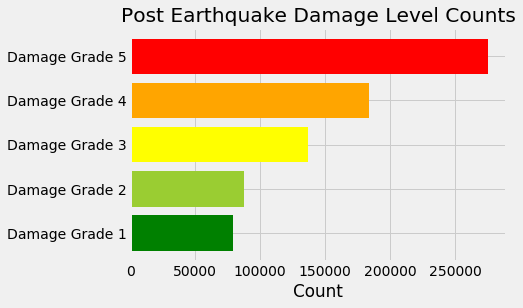

In [13]:
# Plotting each damage_level count

objects = []

for i in range(1,6):
    level = 'Damage Grade ' + str(i)
    objects.append(level)

y_pos = np.arange(1, len(damage_counts) + 1)
plt.style.use('fivethirtyeight')
plt.barh(y_pos, damage_counts, align = 'center', alpha = 1, color = ['green', 'yellowgreen', 'yellow', 'orange', 'red'])
plt.yticks(y_pos, objects)
plt.title('Post Earthquake Damage Level Counts')
plt.xlabel('Count')
plt.savefig('dist.png', bbox_inches='tight')

In [14]:
corr_target_row = corr_target_row.sort_values(ascending=True)
corr_target_row

ground_floor_type_RC                                 -0.408828
has_superstructure_cement_mortar_brick               -0.349327
foundation_type_RC                                   -0.319889
foundation_type_Bamboo/Timber                        -0.243430
has_superstructure_rc_engineered                     -0.211561
has_superstructure_rc_non_engineered                 -0.207983
other_floor_type_Not_applicable                      -0.206328
foundation_type_Cement-Stone/Brick                   -0.175559
plinth_area_sq_ft                                    -0.168040
has_superstructure_timber                            -0.111646
has_superstructure_bamboo                            -0.110451
plan_configuration_L-shape                           -0.086136
has_superstructure_cement_mortar_stone               -0.066192
position_Attached-2_side                             -0.058675
has_superstructure_other                             -0.049148
has_superstructure_mud_mortar_brick                  -0

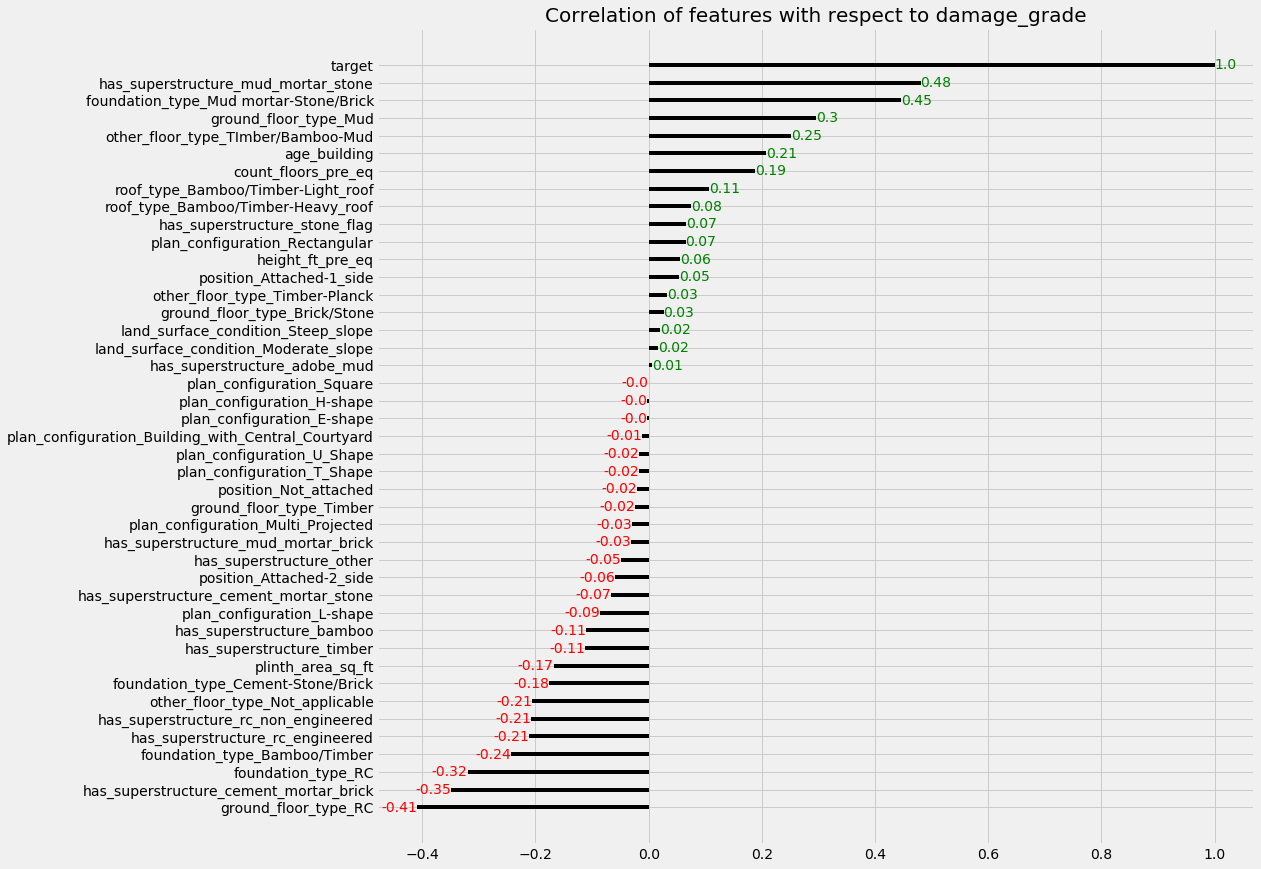

In [15]:
plt.figure(figsize=(14,14))
plt.hlines(y = corr_target_row.index, xmin = 0, xmax = corr_target_row.values)
for x, y, tex in zip(corr_target_row.values, corr_target_row.index, corr_target_row.values):
    t = plt.text(x, y, round(tex, 2), horizontalalignment='right' if x < 0 else 'left', 
    verticalalignment='center', fontdict={'color':'red' if x < 0 else 'green', 'size':14})

plt.title('Correlation of features with respect to damage_grade', fontdict = {'size':20})
plt.savefig('cofwrtdg.png', bbox_inches = 'tight')